In [2]:
import wikipedia
from collections import Counter


In [3]:
import wikipedia
from collections import Counter
import nltk
# the higest-grossing film has been collected there 
#美国近40年年度最高票房电影
films=['Star Wars: Episode V - The Empire Strikes Back',
 'Superman',
 'E.T. the Extra-Terrestrial',
 'Star Wars: Episode VI - Return of the Jedi',
 'Ghostbusters',
 'Back to the Future',
 'Topp Gun',
 'Beverly Hills Cop II',
 'Who Framed Roger Rabbit',
 'Batman',
 'Ghost Ghost',
 'Terminator 2: Judgment Day',
 'Batman Returns 1992',
 'Jurassic Park',
 'The Lion King 1994',
 'Batman Forever',
 'Independence Day 1996 film',
 'Men in Black 1997 film',
 'Titanic film 1997',
 'Star Wars: Episode I - The Phantom Menace',
 'How the Grinch Stole Christmas',
 "Harry Potter and the Sorcerer's Stone",
 'Sppider-Man',
 'Finding NNemo',
 'Shrek 2',
 'Star Wars: Episode III - Revenge of the Sith',
 "Pirates of the Caribbean: Dead Man's Chest",
 'Spider-Man 3',
 'The Dark KKnight',
 'Transformers: Revenge of the Fallen',
 'Avatar',
 'Harry Potter and the Deathly Hallows: Part 2',
 'The Avengers',
 'Iron Man 3',
 'Guardians of the Galaxy',
 'Jurassic World',
 'Finding Dory film 2016',
 'Star Wars: Episode VIII - The Last Jedi',
 'Black Pantherr film',
 'Avengers: Endgame',
 'Bad Boys for Life',
 'Spider-Man: No Way Home',
 'Top Gun: Maverick',
 'Avatar the way of waterr']

keyword_total=[]
#search and store the top3 key words of each film from wikipedia. 
#the common words like a the it this and film name, director name has been deleted 
#检索美不电影在维基百科上最高频出现的三个关键词, 已排除无价值高频词汇
for film in films:
    # download the stop words list
    nltk.download('stopwords')

# search for the movie on Wikipedia
    page = wikipedia.page(film)

# extract the summary
    summary = page.summary

# split the summary into words
    words = summary.split()

# remove punctuation and lowercase the words
    words = [word.strip('.,!?"\'').lower() for word in words]

# remove the stop words from the list
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.add("film")
    stop_words.add("e.t")
    stop_words.add("years")
    film_name = page.title.lower()
    words = [word for word in words if word not in stop_words and not word.isnumeric() 
             and not word.startswith(('\'', '\"', '(')) and not word.lower() == film_name]

# count the frequency of each word and return the top 3
    top_keywords = [word for word, count in Counter(words).most_common(3)]

# print the top keywords
    keyword_total.append(top_keywords)
    
def flatten(keyword_total):
    """Flatten a nested list to a simple list"""
    # Initialize an empty list to store the flattened elements
    flattened_list = [] 
    # Iterate through each element in the nested list
    for element in keyword_total:
        # If the element is a list, recursively flatten it and extend the flattened list
        if isinstance(element, list):
            flattened_list.extend(flatten(element))
        # If the element is not a list, append it to the flattened list
        else:
            flattened_list.append(element)
    
    # Return the flattened list
    return flattened_list




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haishangshengmingyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haishangshengmingyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haishangshengmingyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haishangshengmingyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haishangshengmingyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haishangshengmingyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]  

In [6]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
#通过自然语言相关性对美国文化思潮进行量化呈现
#Through similarity algorithm to make quantitative map of American culture, ideology and discourse
#使用已有的语言模型
# Load a pre-trained word embedding model
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-300")


In [21]:
# 文化维度词汇
#define opposite thoughts in two cultural poles 
culture_item=[['individualism', 'collectivism'], ['patriarchy', 'feminism'], ['minority', 'mainstream'],
              ['strive', 'coziness'], ['adventure','steady'], ['silent value','famous' ], ['real interest', 'emotion'],
              ['elitism', 'equality'], ['personal defined value', 'secular success'], ['extreme', 'moderation'],
              ['carpe diem', 'delayed gratification']]

In [22]:
#检查模型中没有的词汇
second_l=[]
for c in culture_item:
    for w in c:
        try:
            _ = model[w]  # Try to access the word
        except KeyError:
            second_l.append(w)
second_l

['silent value',
 'real interest',
 'personal defined value',
 'secular success',
 'carpe diem',
 'delayed gratification']

In [4]:
#optimize the word form to avoid vocabulary not existing 
#解决词汇格式问题
film_keywords = flatten(keyword_total)
new_value1 = 'avenger'
film_keywords = [new_value1 if x =='avengers:'  else x for x in film_keywords]
new_value2 = 'transformer'
film_keywords = [new_value2 if x =='transformers:'  else x for x in film_keywords]
new_value3 = 'cameron'
film_keywords = [new_value3 if x =="cameron's"  else x for x in film_keywords]
new_value4 = 'caribbean'
film_keywords = [new_value4 if x =="caribbean:"  else x for x in film_keywords]

In [24]:
#计算文化对比词汇与电影关键词的相关性, 现将模型中没有的词汇跳过
#Ignore the words are not existing in the language model at first and filter out them 
import spacy
nlp = spacy.load('en_core_web_lg')

import numpy as np
sub_l = {}
for f in film_keywords:
    if f in model.key_to_index:
        film_key = model[f]
    else:
        print(f)
        continue
    for c in culture_item:
            for w in c:
                if w in model.key_to_index:
                    culture_key = model[w]
                    similarity_score = np.dot(film_key, culture_key) / (np.linalg.norm(film_key) * np.linalg.norm(culture_key))
                    if w in sub_l:
                        sub_l[w] += similarity_score
                    else:
                        sub_l[w] = similarity_score
                
sub_l

{'individualism': -4.207367,
 'collectivism': -12.038312,
 'patriarchy': -9.2269535,
 'feminism': 1.3900905,
 'minority': 8.724618,
 'mainstream': 12.97676,
 'strive': 0.6918388,
 'coziness': -11.528295,
 'adventure': 26.561415,
 'steady': 5.2937512,
 'famous': 22.767927,
 'emotion': 7.189363,
 'elitism': -10.202689,
 'equality': 3.255707,
 'extreme': 10.557682,
 'moderation': -2.1268134}

In [25]:
sub_2={}
for f in film_keywords:
    word=nlp(f)
    for p in second_l:
        p_sentence = nlp(p)
        similarity_scores = [word.similarity(token) for token in p_sentence]
        average_similarity = sum(similarity_scores) / len(similarity_scores)
        if p in sub_2:
            sub_2[p] += average_similarity
        else:
            sub_2[p] = average_similarity


sub_2

/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_52332/3748688702.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_scores = [word.similarity(token) for token in p_sentence]


{'silent value': 13.554369499953435,
 'real interest': 18.241572110157996,
 'personal defined value': 12.39261614752196,
 'secular success': 18.461087884162716,
 'carpe diem': 4.626065137715493,
 'delayed gratification': 8.092911811036672}

In [29]:
sub_l.update(sub_2)
sub_l

{'individualism': -4.207367,
 'collectivism': -12.038312,
 'patriarchy': -9.2269535,
 'feminism': 1.3900905,
 'minority': 8.724618,
 'mainstream': 12.97676,
 'strive': 0.6918388,
 'coziness': -11.528295,
 'adventure': 26.561415,
 'steady': 5.2937512,
 'famous': 22.767927,
 'emotion': 7.189363,
 'elitism': -10.202689,
 'equality': 3.255707,
 'extreme': 10.557682,
 'moderation': -2.1268134,
 'silent value': 13.554369499953435,
 'real interest': 18.241572110157996,
 'personal defined value': 12.39261614752196,
 'secular success': 18.461087884162716,
 'carpe diem': 4.626065137715493,
 'delayed gratification': 8.092911811036672}

Text(0.5, 1.0, 'Opposite Cultural Dimension Score')

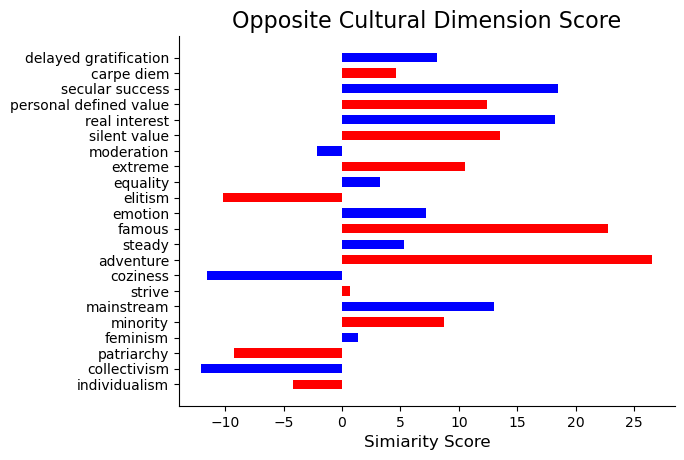

In [30]:
#Visualization of Similarity score 
#可视化文化维度词汇分值
import matplotlib.pyplot as plt

# 将字典按照顺序每两个键值对分为一组
items = list(sub_l.items())
grouped_data = [(k1, v1, k2, v2) for (k1, v1), (k2, v2) in zip(items[::2], items[1::2])]

fig, ax = plt.subplots()



for i, (k1, v1, k2, v2) in enumerate(grouped_data):
    x = [v1, v2]
    y = [k1, k2]
    ax.barh(y, x, height=0.6, color=['red', 'blue'])
    

    
ax.set_xlabel('Simiarity Score', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Opposite Cultural Dimension Score', fontsize=16)



In [10]:
import spacy
nlp = spacy.load('en_core_web_lg')
import pandas as pd



In [31]:
f_ch=[]
m_ch=[]
for f in film_keywords:
    wfl=nlp(f)
    wfe=nlp("feminism")
    wma=nlp("patriarchy")
    similarity_f= wfl.similarity(wfe)
    similarity_m= wfl.similarity(wma)
    f_ch.append(similarity_f)
    m_ch.append(similarity_m)
    

/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_24413/3127542698.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_f= wfl.similarity(wfe)
/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_24413/3127542698.py:8: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_m= wfl.similarity(wma)


In [33]:
f_s=[]
for i in range(0, len(f_ch), 3):
    score=f_ch[i]+f_ch[i+1]+f_ch[i+2]
    f_s.append(score)



In [34]:
m_s=[]
for q in range(0, len(m_ch), 3):
    score=m_ch[q]+m_ch[q+1]+m_ch[q+2]
    m_s.append(score)

In [58]:
df_f = pd.DataFrame.from_dict(f_s)
df_m = pd.DataFrame.from_dict(m_s)
df_f.index = range(1980, 1980+len(f_s))
df_m.index = range(1980, 1980+len(m_s))
merged_df = df_f.merge(df_m, left_index=True, right_index=True)
merged_df

,0_x,0_y
1980,0.635542,1.004957
1981,0.984548,0.658465
1982,0.231692,0.232281
1983,0.161282,0.314368
1984,0.157877,0.181273
1985,0.463119,0.449532
1986,0.335886,0.272120
1987,0.079797,0.222479
1988,0.360573,0.111960
1989,0.601013,0.220016


,0


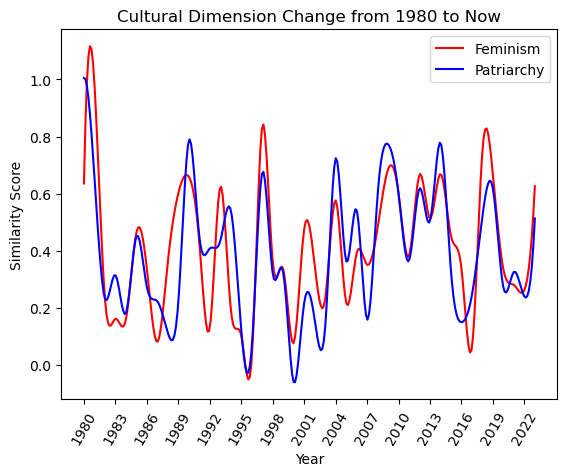

In [72]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Sample data
x = merged_df.index
y1 = merged_df['0_x']
y2 = merged_df['0_y']

# Create interpolation functions
f1 = interp1d(x, y1, kind='cubic')
f2 = interp1d(x, y2, kind='cubic')

# Create a higher-resolution grid for plotting
x_new = np.linspace(x.min(), x.max(), num=300, endpoint=True)

# Plot the smoothed curves
plt.plot(x_new, f1(x_new), label='Feminism', color='r')
plt.plot(x_new, f2(x_new), label='Patriarchy', color='b')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Similarity Score')
plt.title('Cultural Dimension Change from 1980 to Now')
plt.legend()

years = range(1980, 2024,3)

# show tick labels for every year
plt.xticks(years, rotation=60)
# Show plot
plt.show()


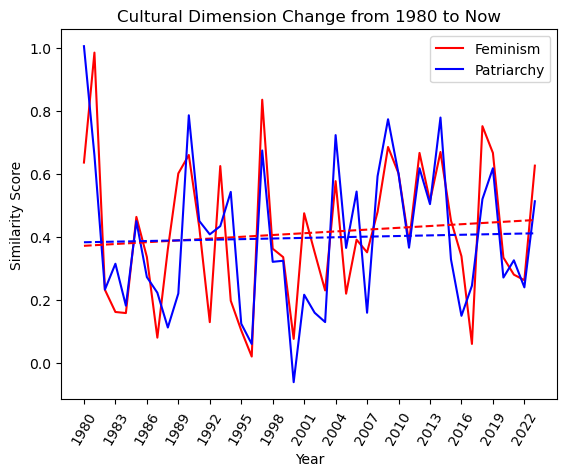

Feminism slope: 0.0019039439140938305
Patriarchy slope: 0.0006614628085662695


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# create a pandas DataFrame with the merged data
merged_df = pd.merge(df_f, df_m, how='outer', left_index=True, right_index=True)
merged_df.columns = ['Feminism', 'Patriarchy']

# fit a linear regression line to the Feminism line
slope_f, intercept_f, rvalue_f, pvalue_f, stderr_f = linregress(merged_df.index, merged_df['Feminism'])

# fit a linear regression line to the Patriarchy line
slope_m, intercept_m, rvalue_m, pvalue_m, stderr_m = linregress(merged_df.index, merged_df['Patriarchy'])

# plot the data with the regression lines
plt.plot(merged_df.index, merged_df['Feminism'], label='Feminism', color='r')
plt.plot(merged_df.index, merged_df['Patriarchy'], label='Patriarchy', color='b')
plt.plot(merged_df.index, slope_f * merged_df.index + intercept_f, color='r', linestyle='dashed')
plt.plot(merged_df.index, slope_m * merged_df.index + intercept_m, color='b', linestyle='dashed')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Similarity Score')
plt.title('Cultural Dimension Change from 1980 to Now')

# create an array of all years to show on the x-axis
years = range(1980, 2024, 3)

# show tick labels for every year
plt.xticks(years, rotation=60)

# add a legend to the plot
plt.legend()

# show plot
plt.show()

# print the slopes
print("Feminism slope:", slope_f)
print("Patriarchy slope:", slope_m)



In [169]:
# US GDP
#美国1980-2023GDP
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product'
html_content = requests.get(url).text

soup = BeautifulSoup(html_content, "html.parser")

table = soup.find_all('table')[1]  
#table很适合直接换成dataframe
df = pd.read_html(str(table))[0] # convert HTML table to a Pandas dataframe
df.set_index(('U.S. GDP - Historical Data',       'Year'), inplace=True)
#delete index name 
df.index.name = None
#filter out is series not dataframe
df_gdp=df.iloc[0:42, 0]
df_gdp = df_gdp.str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
#$$$$$series to frame
df_gdp = df_gdp.to_frame(name='GDP')
df_gdp.loc[len(df_gdp)] = [23618]
df_gdp.loc[len(df_gdp)+1] = [25460]

df_gdp

/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_24413/18428927.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_gdp = df_gdp.str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)


,GDP
2021,23315.08
2020,21060.47
2019,21380.98
2018,20533.06
2017,19477.34
2016,18695.11
2015,18206.02
2014,17550.68
2013,16843.19
2012,16253.97


In [185]:
last_row_1 = df_gdp.iloc[[-1]]

# append the last row to the beginning of the dataframe
df_gdp_1 = last_row_1.append(df_gdp.drop(df_gdp.index[-1]))
# reset the index of the dataframe


last_row_2 = df_gdp_1.iloc[[-1]]

# append the last row to the beginning of the dataframe
df_gdp_2 = last_row_2.append(df_gdp_1.drop(df_gdp_1.index[-1]))
# reset the index of the dataframe

df_gdp_2


/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_24413/4254141068.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp_1 = last_row_1.append(df_gdp.drop(df_gdp.index[-1]))
/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_24413/4254141068.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp_2 = last_row_2.append(df_gdp_1.drop(df_gdp_1.index[-1]))


,GDP
42,23618.00
44,25460.00
2021,23315.08
2020,21060.47
2019,21380.98
2018,20533.06
2017,19477.34
2016,18695.11
2015,18206.02
2014,17550.68


In [193]:
y = []
for i in range(2023, 1979, -1):
    y.append(i)
    
df_gdp_2['year']=y
df_gdp_2 = df_gdp_2.reset_index(drop=True).set_index('year')
gdp = df_gdp_2.sort_index(ascending=True)
gdp

,GDP
year,
1980,2857.31
1981,3207.04
1982,3343.79
1983,3634.04
1984,4037.61
1985,4338.98
1986,4579.63
1987,4855.22
1988,5236.44


In [218]:
# test correlation between gdp and partriarchy / feminism
gdp.index = range(1980, 1980+len(gdp))
gdp_f = df_f.merge(gdp, left_index=True, right_index=True)
gdp_m = df_m.merge(gdp, left_index=True, right_index=True)
gdp_f = gdp_f.rename(columns={0: 'Feminism Score'})
gdp_m = gdp_m.rename(columns={0: 'Patriarchy Score'})

array([[1.        , 0.11452431],
       [0.11452431, 1.        ]])

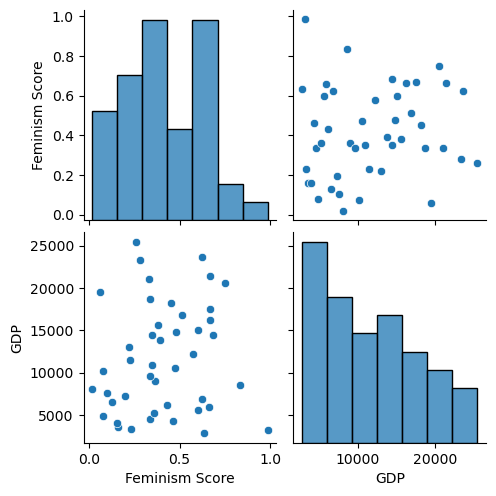

In [226]:
import seaborn as sns
%matplotlib inline
sns.pairplot(gdp_f)
np.corrcoef(gdp_f['Feminism Score'], gdp_f['GDP'])
#very weak positive correlation 

array([[1.        , 0.04741717],
       [0.04741717, 1.        ]])

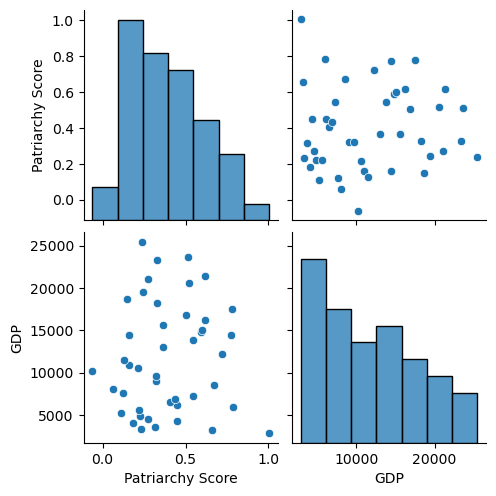

In [227]:
sns.pairplot(gdp_m)
np.corrcoef(gdp_m['Patriarchy Score'], gdp['GDP'])
#Patriarchy adn GDP correlation is more weaker 

In [ ]:
#Change simialrity alogirithsm to test whether result different 
#改变相关性算法观察结果是否不同
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-300")
f_c=[]
m_c=[]
for f in film_keywords:
    fls=model[f]
    fs=model["feminism"]
    ms=model["patriarchy"]
    sim_f=np.dot(fls, fs) / (np.linalg.norm(fls) * np.linalg.norm(fs))
    sim_m=np.dot(fls, ms) / (np.linalg.norm(fls) * np.linalg.norm(ms))
    f_c.append(sim_f)
    m_c.append(sim_m)
fs_t=[]
for i in range(0, len(f_c), 3):
    sc=f_c[i]+f_c[i+1]+f_c[i+2]
    fs_t.append(sc)
ms_t=[]
for q in range(0, len(m_c), 3):
    sc=m_c[q]+m_c[q+1]+m_c[q+2]
    ms_t.append(sc)
fs_df = pd.DataFrame.from_dict(fs_t)
ms_df = pd.DataFrame.from_dict(ms_t)
fs_df.index = range(1980, 1980+len(fs_t))
ms_df.index = range(1980, 1980+len(ms_t))
j_df = fs_df.merge(ms_df, left_index=True, right_index=True)
j_df

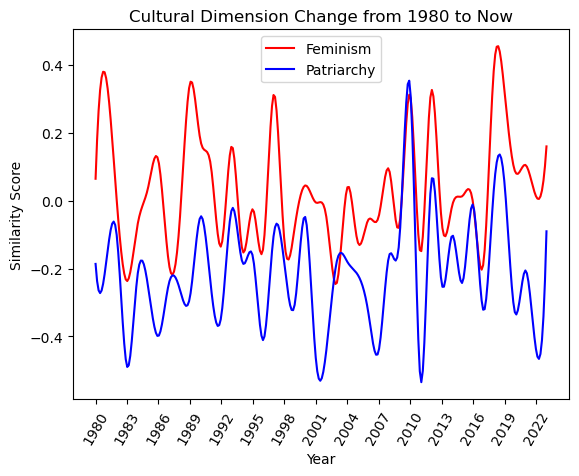

In [236]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Sample data
x = j_df.index
y1 = j_df['0_x']
y2 = j_df['0_y']

# Create interpolation functions
f1 = interp1d(x, y1, kind='cubic')
f2 = interp1d(x, y2, kind='cubic')

# Create a higher-resolution grid for plotting
x_new = np.linspace(x.min(), x.max(), num=300, endpoint=True)

# Plot the smoothed curves
plt.plot(x_new, f1(x_new), label='Feminism', color='r')
plt.plot(x_new, f2(x_new), label='Patriarchy', color='b')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Similarity Score')
plt.title('Cultural Dimension Change from 1980 to Now')
plt.legend()

years = range(1980, 2024,3)

# show tick labels for every year
plt.xticks(years, rotation=60)
# Show plot
plt.show()


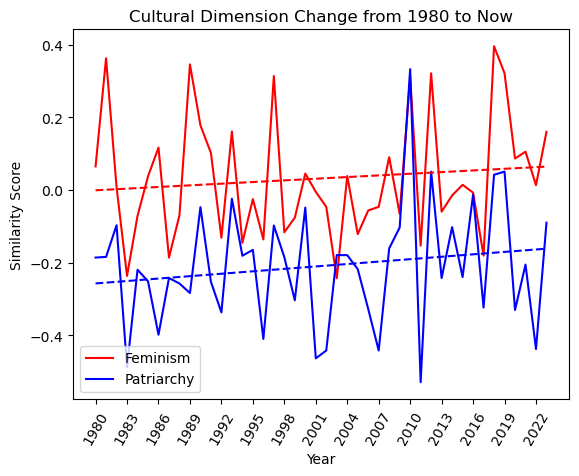

Feminism slope: 0.0015192016434131834
Patriarchy slope: 0.0022266264167404917


In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# fit a linear regression line to the Feminism line
slope_f, intercept_f, rvalue_f, pvalue_f, stderr_f = linregress(j_df.index, j_df['0_x'])

# fit a linear regression line to the Patriarchy line
slope_m, intercept_m, rvalue_m, pvalue_m, stderr_m = linregress(j_df.index, j_df['0_y'])

# plot the data with the regression lines
plt.plot(j_df.index, j_df['0_x'], label='Feminism', color='r')
plt.plot(j_df.index, j_df['0_y'], label='Patriarchy', color='b')
plt.plot(j_df.index, slope_f * j_df.index + intercept_f, color='r', linestyle='dashed')
plt.plot(j_df.index, slope_m * j_df.index + intercept_m, color='b', linestyle='dashed')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Similarity Score')
plt.title('Cultural Dimension Change from 1980 to Now')

# create an array of all years to show on the x-axis
years = range(1980, 2024, 3)

# show tick labels for every year
plt.xticks(years, rotation=60)

# add a legend to the plot
plt.legend()

# show plot
plt.show()

# print the slopes
print("Feminism slope:", slope_f)
print("Patriarchy slope:", slope_m)



,0_x,0_y
1980,0.064664,-0.186327
1981,0.362574,-0.184501
1982,0.008075,-0.097247
1983,-0.236908,-0.488533
1984,-0.071603,-0.219908
1985,0.037283,-0.251576
1986,0.116656,-0.398847
1987,-0.186426,-0.242707
1988,-0.069689,-0.257751
1989,0.345657,-0.284090
